# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال فیلتر روی تصویر</div>

## Uniform weights

$$K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

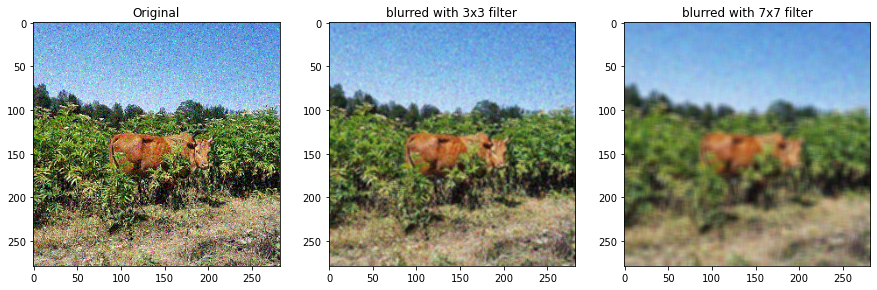

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('images/noisy-cow.png')

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)


# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)

plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(132);plt.imshow(blurred[...,::-1]);plt.title("blurred with 3x3 filter");
plt.subplot(133);plt.imshow(blurred2[...,::-1]);plt.title("blurred with 7x7 filter");

## Non-uniform weights

If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

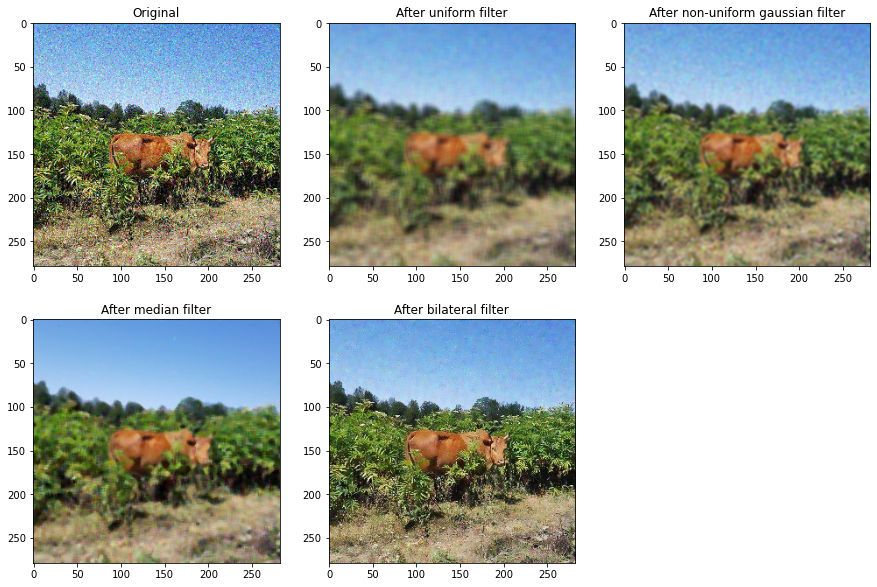

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/noisy-cow.png')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (7,7))

# Instead of box filter, gaussian kernel
gaussian = cv2.GaussianBlur(image, (7,7), 0)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)


plt.figure(figsize=[15,10])
plt.subplot(231);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(blur[...,::-1]);plt.title("After uniform filter");
plt.subplot(233);plt.imshow(gaussian[...,::-1]);plt.title("After non-uniform gaussian filter");
plt.subplot(234);plt.imshow(median[...,::-1]);plt.title("After median filter");
plt.subplot(235);plt.imshow(bilateral[...,::-1]);plt.title("After bilateral filter");

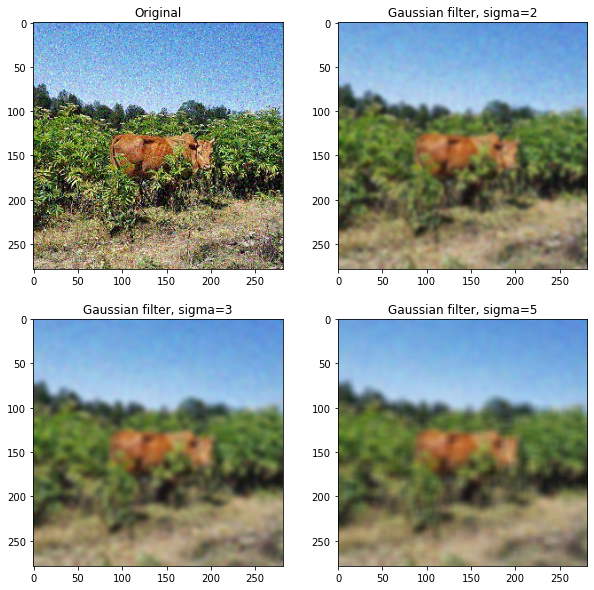

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/noisy-cow.png')

gaussian2 = cv2.GaussianBlur(image, (11,11), 2)
gaussian3 = cv2.GaussianBlur(image, (11,11), 3)
gaussian5 = cv2.GaussianBlur(image, (11,11), 5)

plt.figure(figsize=[10,10])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(222);plt.imshow(gaussian2[...,::-1]);plt.title("Gaussian filter, sigma=2");
plt.subplot(223);plt.imshow(gaussian3[...,::-1]);plt.title("Gaussian filter, sigma=3");
plt.subplot(224);plt.imshow(gaussian5[...,::-1]);plt.title("Gaussian filter, sigma=5");

## Image De-noising - Non-Local Means Denoising

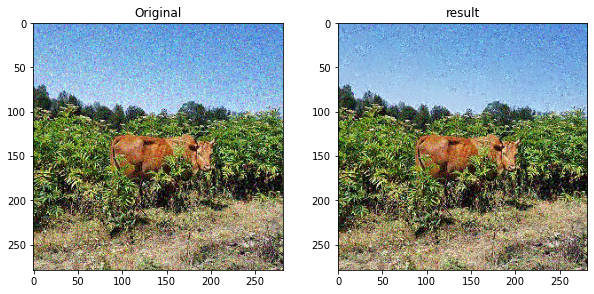

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/noisy-cow.png')

# Parameters, after None are - the filter strength 'h' (5-10 is a good range)
# Next is hForColorComponents, set as same value as h again
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

plt.figure(figsize=[10,10])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(222);plt.imshow(dst[...,::-1]);plt.title("result");

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

https://docs.opencv.org/3.3.1/d5/d69/tutorial_py_non_local_means.html